In [77]:
library(tidyverse)
library(scales)
library(patchwork)

In [2]:
df = read_csv(
    'https://raw.githubusercontent.com/fivethirtyeight/data/master/bechdel/movies.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  year = col_double(),
  imdb = col_character(),
  title = col_character(),
  test = col_character(),
  clean_test = col_character(),
  binary = col_character(),
  budget = col_double(),
  domgross = col_character(),
  intgross = col_character(),
  code = col_character(),
  `budget_2013$` = col_double(),
  `domgross_2013$` = col_character(),
  `intgross_2013$` = col_character(),
  `period code` = col_double(),
  `decade code` = col_double()
)




In [142]:
clean = df%>%
filter(!grepl('#N/A', `intgross_2013$`))%>%
filter(!grepl('#N/A', `domgross_2013$`))%>%
group_by(year)%>%
mutate(adjdom = `domgross_2013$`, adjint = `intgross_2013$`, adjbudget = `budget_2013$`)%>%
mutate(adjbudget = as.numeric(adjbudget))%>%
mutate(adjdom = as.numeric(adjdom)) %>%
mutate(adjint = as.numeric(adjint))%>%
mutate(wwgross = adjdom + adjint) %>%
mutate(roi = wwgross/adjbudget)%>%
select(year, title, binary, adjbudget, wwgross, roi) %>%
filter(roi>1)%>%
arrange(year)%>%
mutate(filmsperyear = n())%>%
mutate(Decade = year%/% 10 * 10)%>%
group_by(Decade)%>%
mutate(filmsperdecade = n())
clean%>%head

#Table including necessary info needed for analysis and to sift through

year,title,binary,adjbudget,wwgross,roi,filmsperyear,Decade,filmsperdecade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1970,Beyond the Valley of the Dolls,PASS,5997631,107957366,18.000001,1,1970,50
1971,Escape from the Planet of the Apes,FAIL,14386286,141561050,9.840000,4,1970,50
1971,Shaft,FAIL,305063707,1021529721,3.348578,4,1970,50
1971,The French Connection,FAIL,12659931,473697306,37.417053,4,1970,50
1971,Willy Wonka &amp; the Chocolate Factory,FAIL,17263543,46036114,2.666667,4,1970,50
1972,Pink Flamingos,PASS,66866,4611524,68.966650,2,1970,50


In [4]:
bar = clean %>%
group_by(Decade, binary)%>%
count(filmsperdecade)
#bar

Warning message:
“Ignoring unknown parameters: stat”


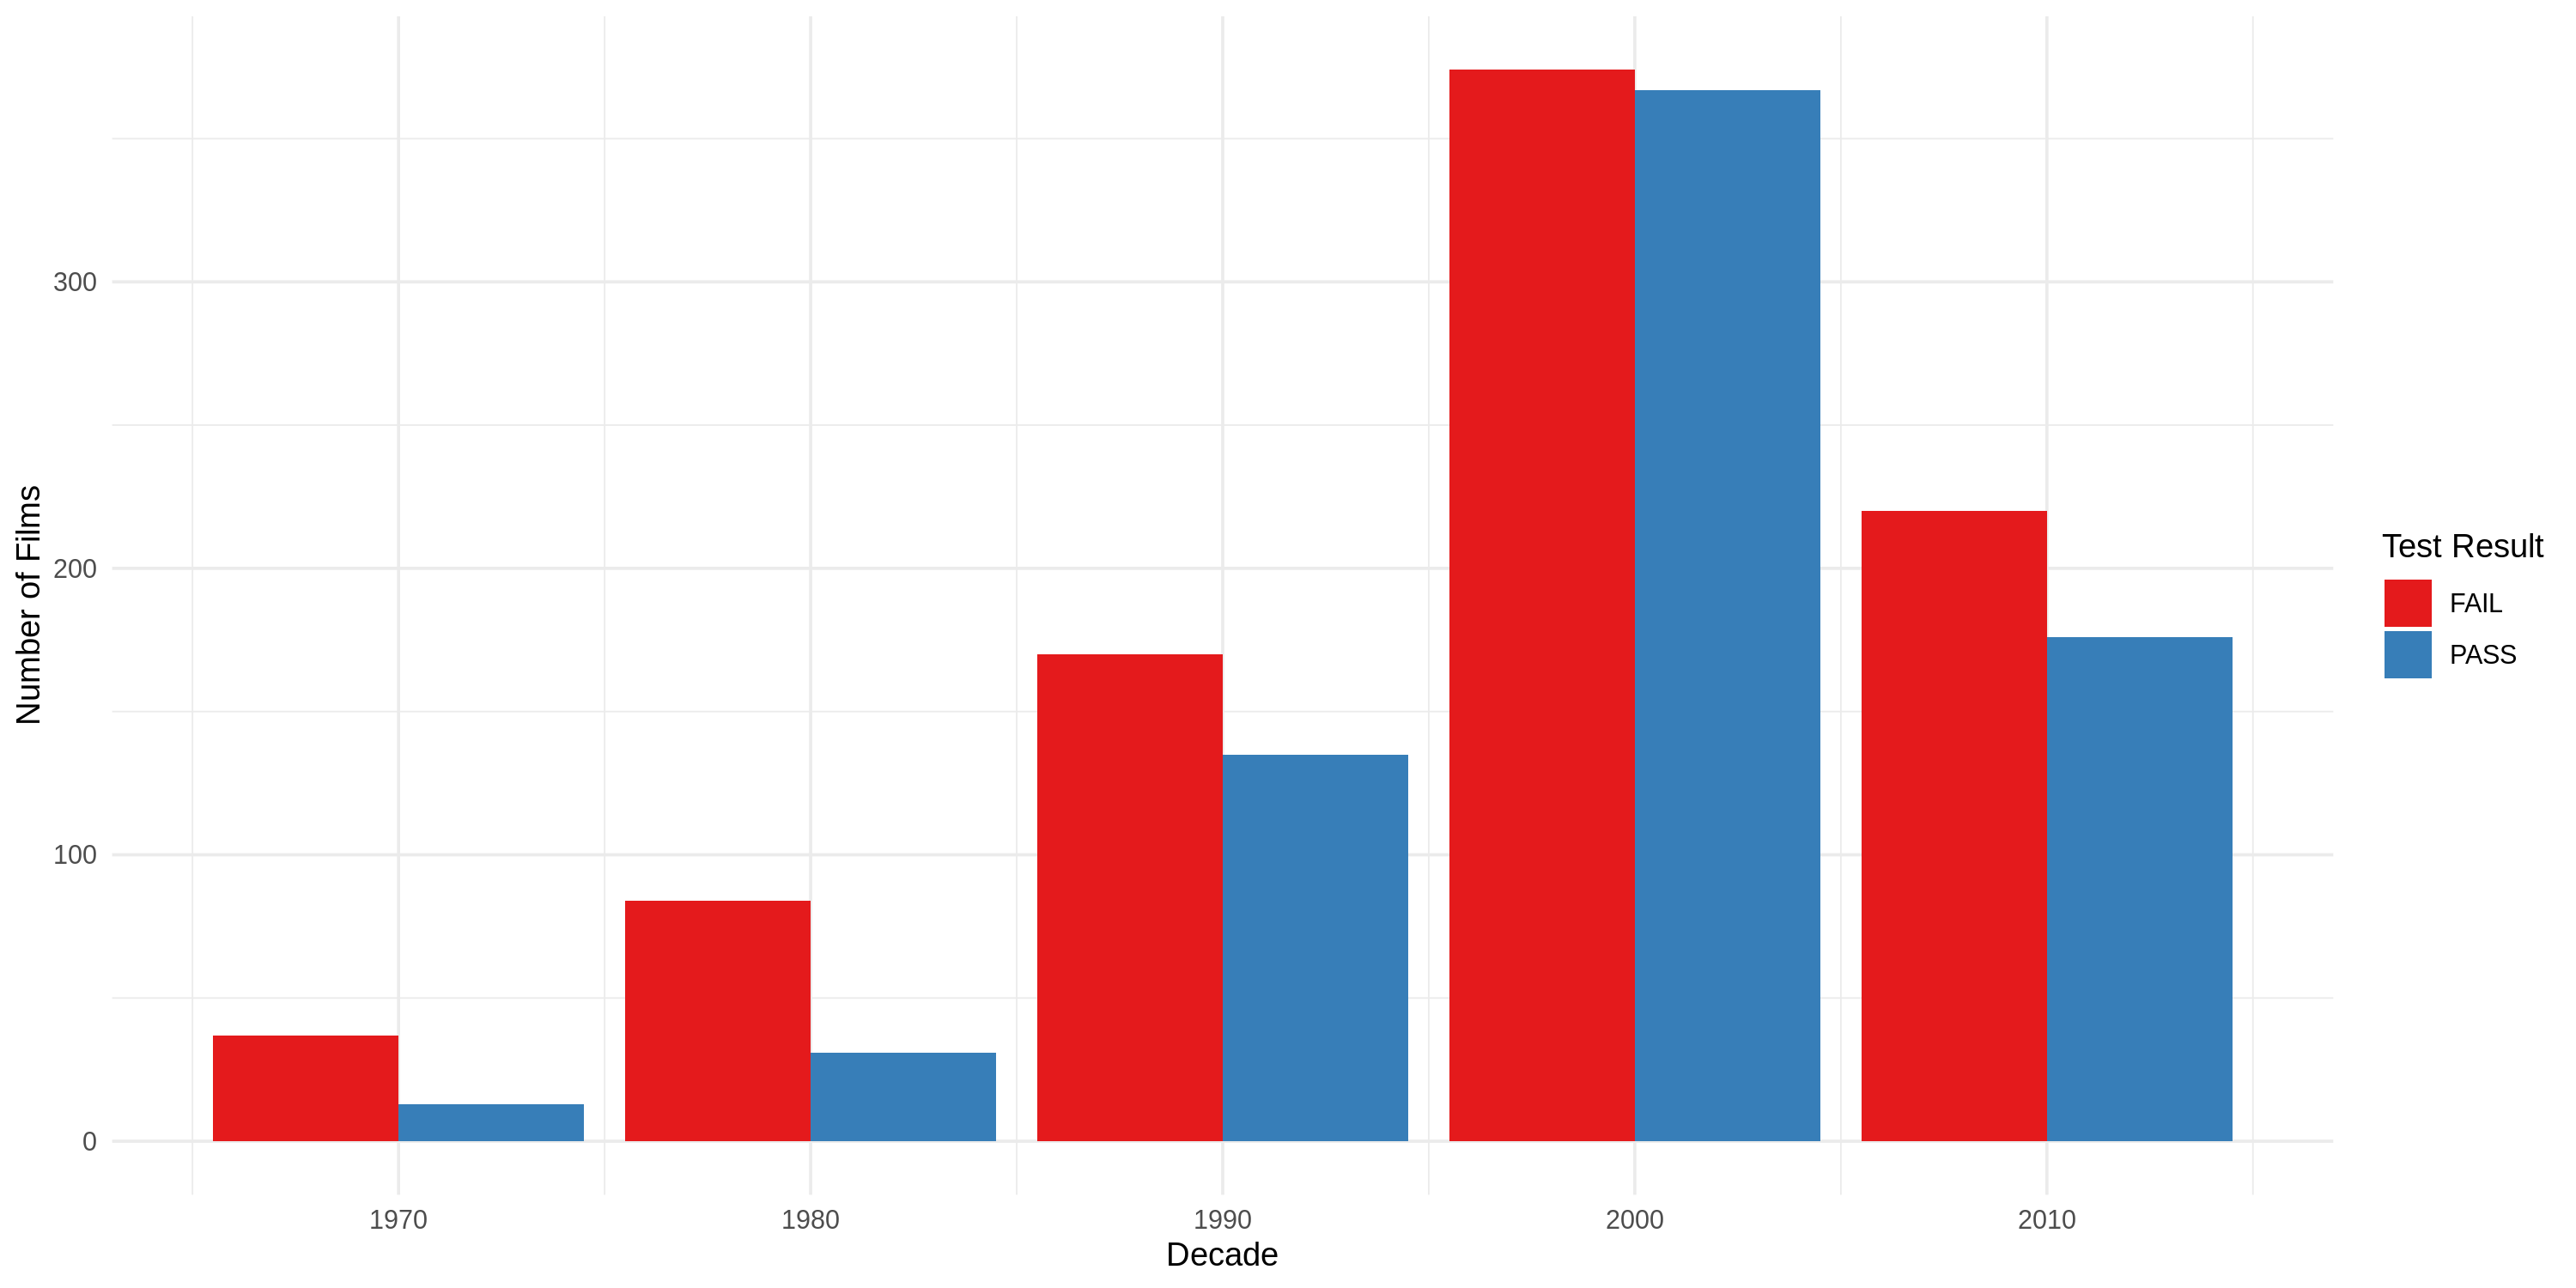

In [100]:
p = ggplot(bar, aes(x = Decade, y = n, fill = binary))

p = p + geom_col(stat = identity, position = "dodge")

p = p + scale_fill_brewer(palette = 'Set1') 

p = p + theme_minimal()

p = p + labs(y='Number of Films', fill = "Test Result")

p

#Bar Graph showing number of films in each decade by their Bechdel Test Results

In [52]:
gross = clean %>%
    group_by(binary, year) %>%
    summarize(wwgross = sum(wwgross)) %>%
    arrange(year) %>%
    mutate(binary = fct_inorder(binary))
#gross

`summarise()` has grouped output by 'binary'. You can override using the `.groups` argument.



In [119]:
p1 = ggplot(gross, aes(x = year, y = wwgross, group = binary, color = binary))
p1 = p1 + geom_line() + geom_point(size = 0.5)
p1 = p1 + labs(y='Total Worldwide Gross (2013 Adjusted)', color = "Test Result")
p1 = p1 + scale_y_continuous(labels = comma)
#p1

In [55]:
budget = clean %>%
    group_by(binary, year) %>%
    summarize(totbudget = sum(adjbudget)) %>%
    arrange(year) %>%
    mutate(binary = fct_inorder(binary))
# budget

`summarise()` has grouped output by 'binary'. You can override using the `.groups` argument.



In [117]:
p2 = ggplot(budget, aes(x = year, y = totbudget, group = binary, color = binary))
p2 = p2 + geom_line() + geom_point(size = 0.5)
p2 = p2 + labs(y='Total Budget (2013 Adjusted)', color = "Test Result")
p2 = p2 + scale_y_continuous(labels = comma)
#p2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



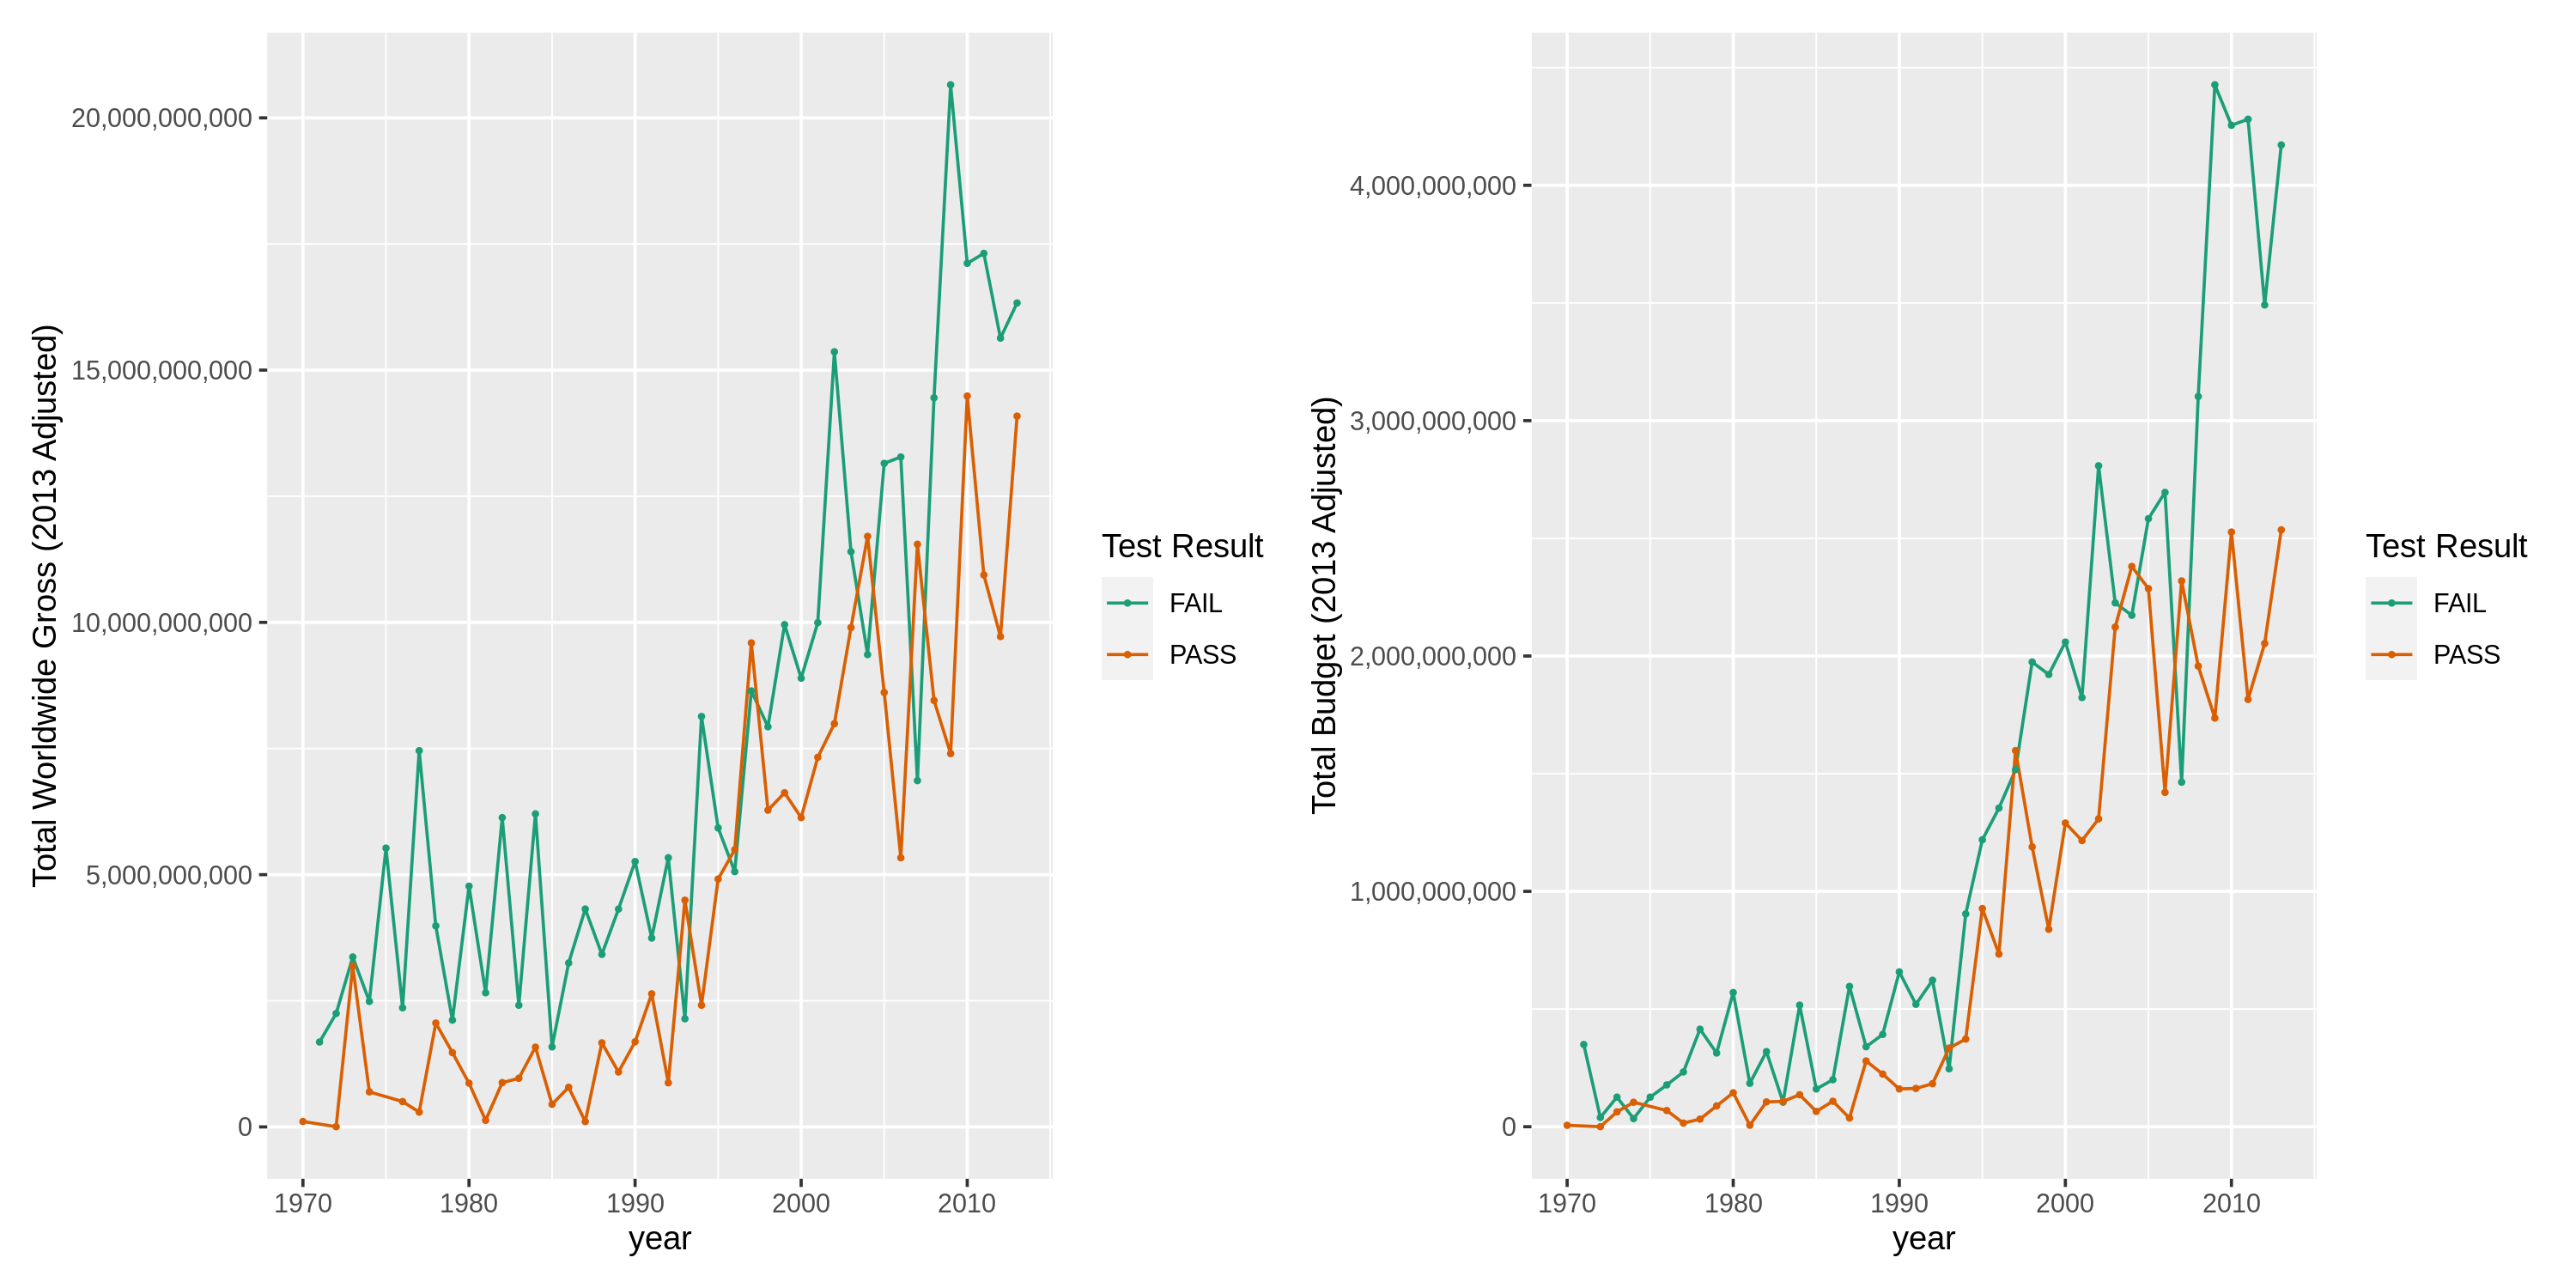

In [140]:
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 250)
p1 = p1 + scale_color_brewer(palette = 'Dark2')
p1 = p1 + theme_gray()
p2 = p2 + theme_gray()
p2 = p2 + scale_color_brewer(palette = 'Dark2')
p3 = p1 + p2
p3

#2 plots showing worldwide gross and budget of films by their Bechdel Test Results. 